# Level 1: Task 1: Data Exploration and Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data=pd.read_csv("Dataset .csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Explore the dataset and identify the number of rows and columns.

In [3]:
data.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [5]:
data.shape

(9551, 21)

### Check for missing values in each column and handle them accordingly.

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
data["Cuisines"].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
data.duplicated().sum()

0

### Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [12]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
target_column = 'Aggregate rating'
print(data[target_column].describe())

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


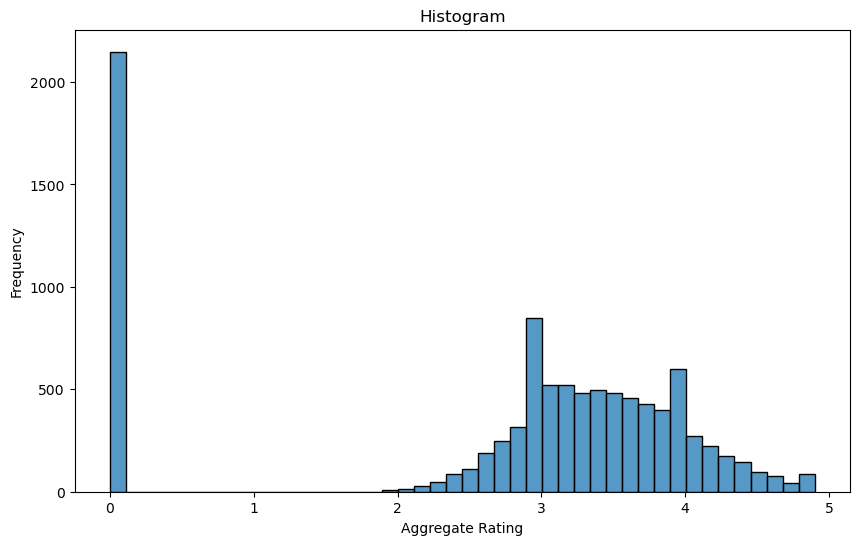

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], palette='viridis')
plt.title('Histogram')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

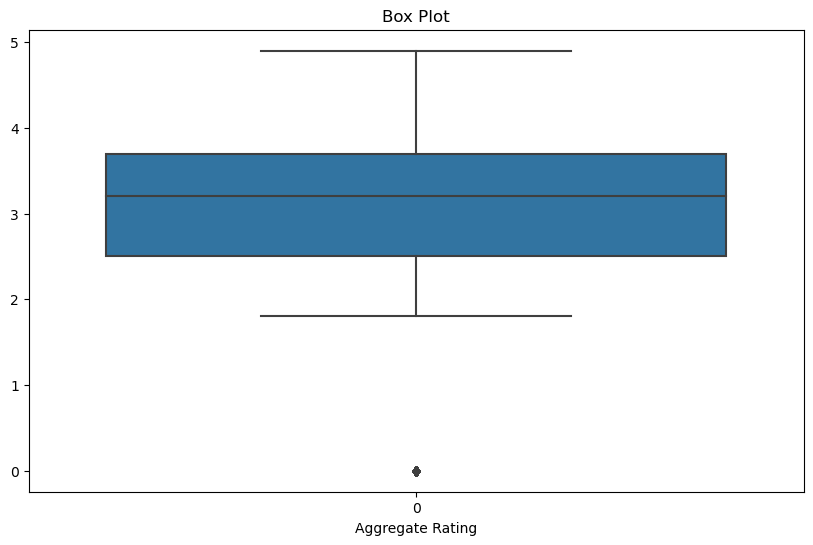

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data[target_column])
plt.title("Box Plot")
plt.xlabel("Aggregate Rating")
plt.show()

# Level-1: Task 2: Descriptive Analysis

### Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [16]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
print("MEAN")
data.mean()

MEAN


Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64

In [18]:
print("MEDIAN")
data.median()

MEDIAN


Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64

In [19]:
print("STANDARD DEVIATION")
data.std()

STANDARD DEVIATION


Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64

In [20]:
print("VARIANCE")
data.var()

VARIANCE


Restaurant ID           7.729869e+13
Country Code            3.186783e+03
Longitude               1.697242e+03
Latitude                1.212222e+02
Average Cost for two    2.601364e+08
Price range             8.200445e-01
Aggregate rating        2.300038e+00
Votes                   1.850749e+05
dtype: float64

In [21]:
print("MINIMUM")
data.min()

MINIMUM


Restaurant ID                                                          53
Restaurant Name                                                       #45
Country Code                                                            1
City                                                            Abu Dhabi
Address                 1 & 2, Block A-5 B, DDA Market, Paschim Vihar,...
Locality                                ILD Trade Centre Mall, Sohna Road
Locality Verbose               ILD Trade Centre Mall, Sohna Road, Gurgaon
Longitude                                                     -157.948486
Latitude                                                       -41.330428
Cuisines                                                          Afghani
Average Cost for two                                                    0
Currency                                                 Botswana Pula(P)
Has Table booking                                                      No
Has Online delivery                   

In [22]:
print("MAXIMUM")
data.max()

MAXIMUM


Restaurant ID                                                    18500652
Restaurant Name                                         �ukura��a Sofras۱
Country Code                                                          216
City                                                            ��stanbul
Address                 ��mitk�_y Mahallesi, 2432. Cadde (8. Cadde), N...
Locality                                                        ��mitk�_y
Locality Verbose                                        ��mitk�_y, Ankara
Longitude                                                      174.832089
Latitude                                                         55.97698
Cuisines                                  World Cuisine, Patisserie, Cafe
Average Cost for two                                               800000
Currency                                                 Turkish Lira(TL)
Has Table booking                                                     Yes
Has Online delivery                   

In [23]:
print("QUANTILE 25%")
data.quantile(0.25)

QUANTILE 25%


Restaurant ID           301931.250000
Country Code                 1.000000
Longitude                   77.081565
Latitude                    28.478658
Average Cost for two       250.000000
Price range                  1.000000
Aggregate rating             2.500000
Votes                        5.000000
Name: 0.25, dtype: float64

In [24]:
print("QUANTILE 50%")
data.quantile(0.5)

QUANTILE 50%


Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
Name: 0.5, dtype: float64

In [25]:
print("QUANTILE 75%")
data.quantile(0.75)

QUANTILE 75%


Restaurant ID           1.835260e+07
Country Code            1.000000e+00
Longitude               7.728204e+01
Latitude                2.864271e+01
Average Cost for two    7.000000e+02
Price range             2.000000e+00
Aggregate rating        3.700000e+00
Votes                   1.300000e+02
Name: 0.75, dtype: float64

### Explore the distribution of categorical variables like "Country Code, " "City," and "Cuisines." Identify the top cuisines and cities with the highest number of restaurants.

In [26]:
data['Country Code'].value_counts()

1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

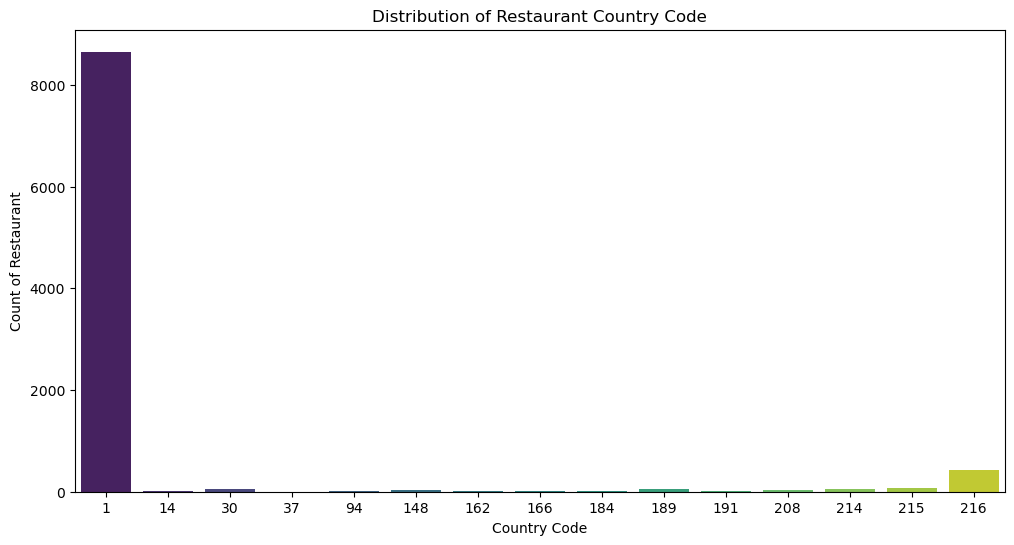

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Country Code",data=data,palette="viridis")
plt.title('Distribution of Restaurant Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count of Restaurant')
plt.show()

In [28]:
print("Top 20 Countries")
data["City"].value_counts().head(20)

Top 20 Countries


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Dubai             20
Kochi             20
Indore            20
Jaipur            20
Kanpur            20
Ludhiana          20
Kolkata           20
Agra              20
Mangalore         20
Mumbai            20
Name: City, dtype: int64

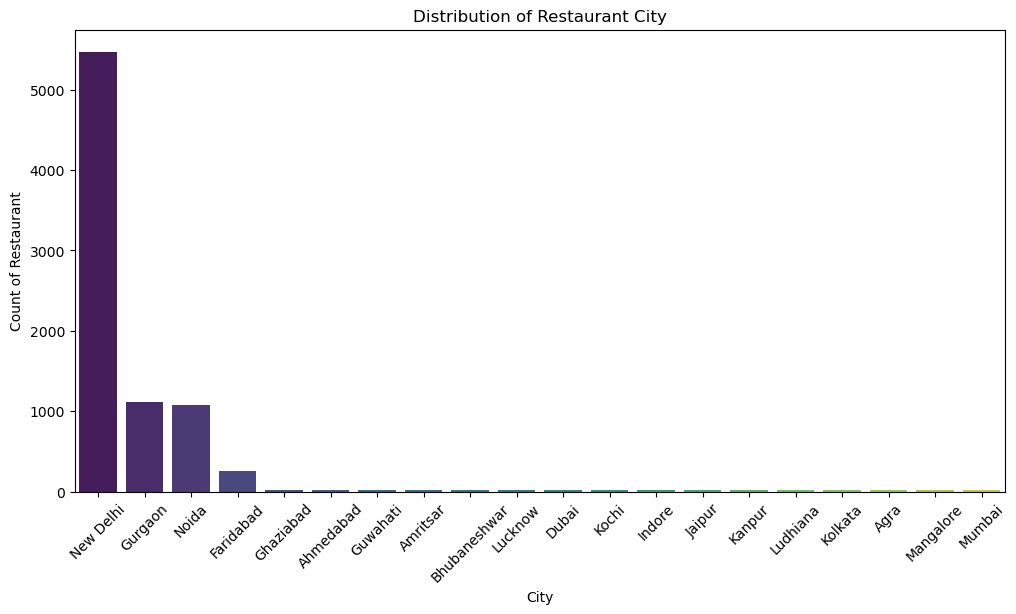

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x="City",data=data,order=data["City"].value_counts().head(20).index,palette="viridis")
plt.title('Distribution of Restaurant City')
plt.xlabel('City')
plt.ylabel('Count of Restaurant')
plt.xticks(rotation=45)
plt.show()

In [30]:
print("Top 20 Cuisines")
data["Cuisines"].value_counts().head(20)

Top 20 Cuisines


North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64

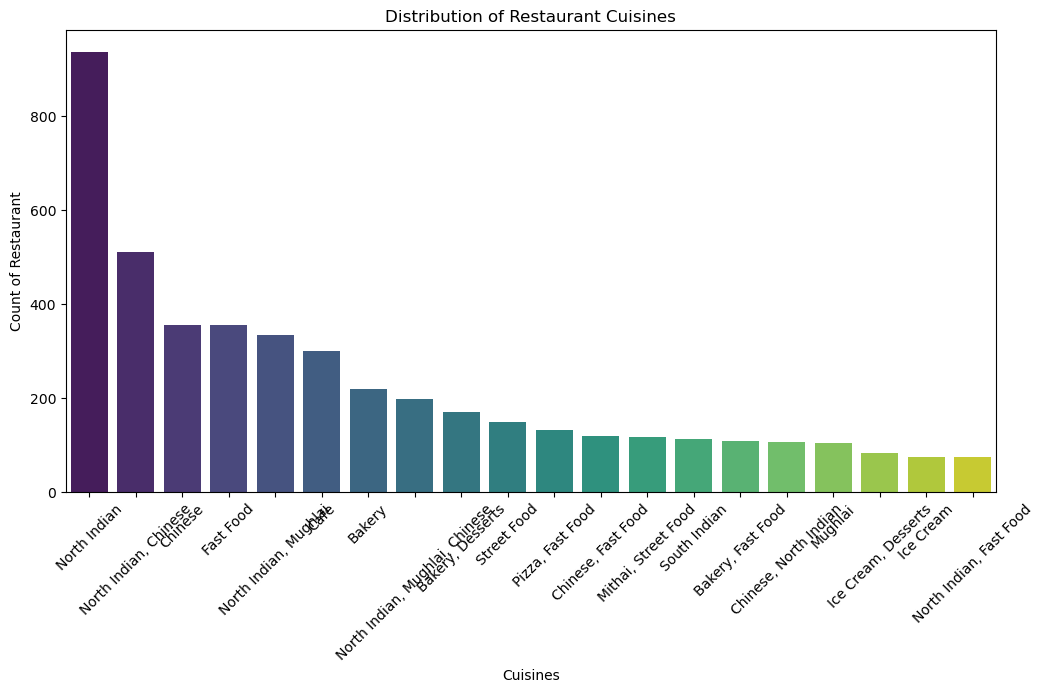

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Cuisines",data=data,order=data["Cuisines"].value_counts().head(20).index,palette="viridis")
plt.title('Distribution of Restaurant Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Count of Restaurant')
plt.xticks(rotation=45)
plt.show()

# Level-1: Task-3: Geospatial Analysis

### Visualize the locations of restaurants on a map using latitude and longitude information.

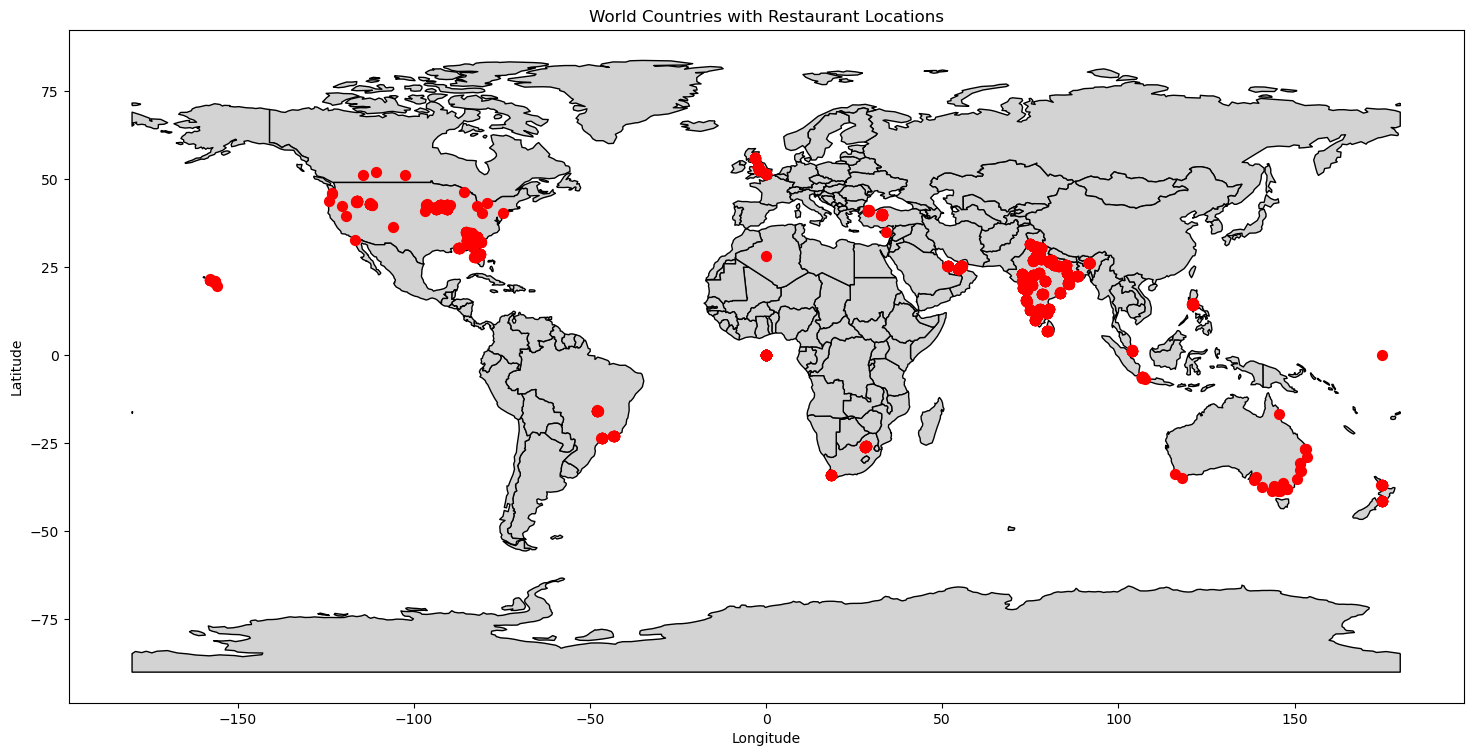

In [32]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(18, 15))
world.plot(ax=ax, color='lightgrey', edgecolor='black', legend=True)
gdf.plot(ax=ax, marker='o', color='red', markersize=50)
ax.set_title('World Countries with Restaurant Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

### Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

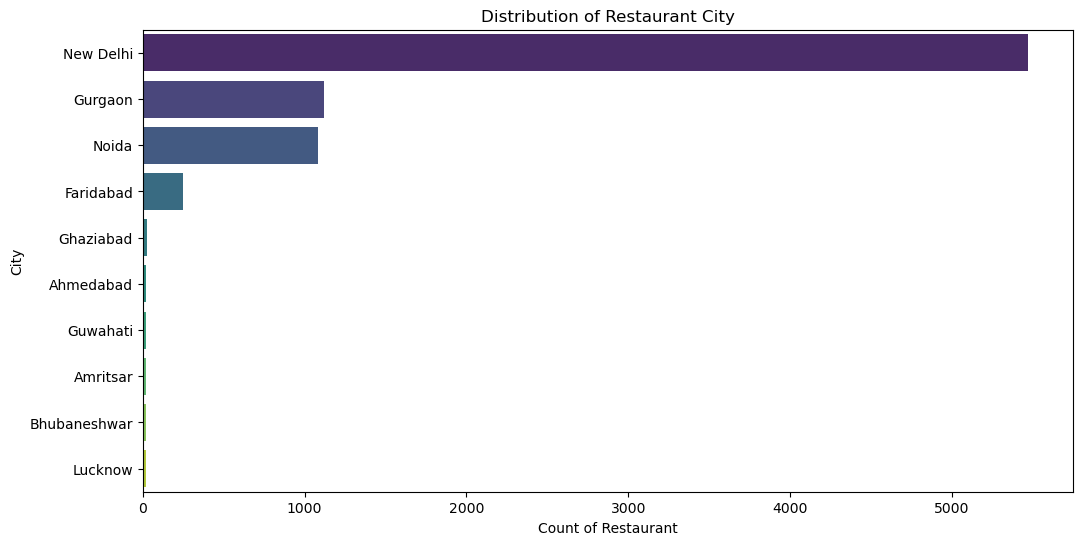

In [33]:
plt.figure(figsize=(12, 6))  
sns.countplot(y=data["City"], order=data.City.value_counts().head(10).index, palette="viridis")  
plt.xlabel("Count of Restaurant") 
plt.ylabel("City")  
plt.title("Distribution of Restaurant City") 
plt.show()

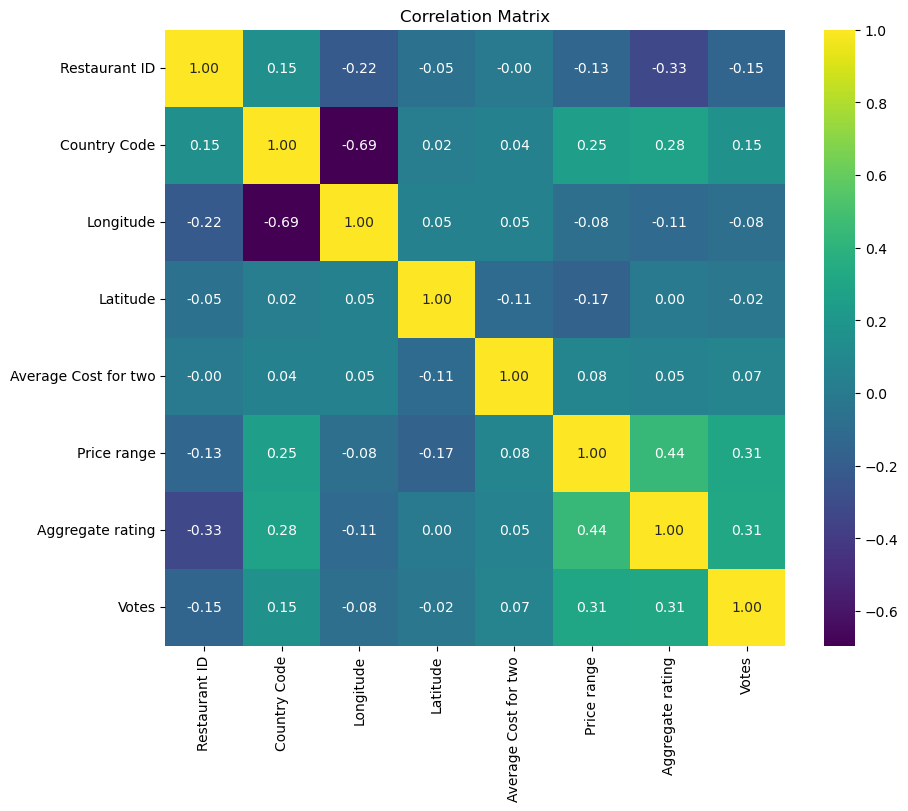

In [34]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Level-2: Task-1: Table Booking and Online Delivery

### Determine the percentage of restaurants that offer table booking and online delivery.

In [35]:
table_booking_count = data['Has Table booking'].value_counts()
online_delivery_count = data['Has Online delivery'].value_counts()

total_restaurants = len(data)
percentage_table_booking = (table_booking_count['Yes'] / total_restaurants) * 100
percentage_online_delivery = (online_delivery_count['Yes'] / total_restaurants) * 100

print(f"Percentage of restaurants offering table booking: {percentage_table_booking:.2f}%")
print(f"Percentage of restaurants offering online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants offering table booking: 12.14%
Percentage of restaurants offering online delivery: 25.69%


### Compare the average ratings of restaurants with table booking and those without.

In [36]:
avg_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating of restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating of restaurants without table booking: {avg_rating_without_table_booking:.2f}")

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


### Analyze the availability of online delivery among restaurants with different price ranges.

In [37]:
price=data["Price range"].unique()
price

array([3, 4, 2, 1], dtype=int64)

In [38]:
online_delivery_by_price = {}

for price in data['Price range'].unique():
    subset = data[data['Price range'] == price]
    online_delivery_counts = subset['Has Online delivery'].value_counts(normalize=True)
    online_delivery_by_price[price] = online_delivery_counts.get('Yes', 0) * 100

print(online_delivery_by_price)

{3: 29.252669039145907, 4: 9.044368600682594, 2: 41.310632830067455, 1: 15.795403334835513}


# Level-2: Task-2: Price Range Analysis

### Determine the most common price range among all the restaurants.

In [39]:
most_common_price_range=(data["Price range"].mode()[0])
print(most_common_price_range)

1


### Calculate the average rating for each price range.

In [40]:
average_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean()
print(average_rating_by_price)

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64


### Identify the color that represents the highest average rating among different price ranges.

In [41]:
highest_rating_price_range = average_rating_by_price.idxmax()
print(highest_rating_price_range)

4


# Level-2: Task-3: Feature Engineering

### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [42]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)
print(data[['Restaurant Name Length', 'Address Length']])

      Restaurant Name Length  Address Length
0                         16              71
1                         16              67
2                         22              56
3                          4              70
4                         11              64
...                      ...             ...
9546                      11             103
9547                      12              77
9548                       5              73
9549                      11              75
9550                      24              65

[9542 rows x 2 columns]


### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [43]:
data["Has Table booking"]=(data["Has Table booking"]=="Yes").astype(int)
data["Has Online delivery"]=(data["Has Online delivery"]=="Yes").astype(int)
print(data[["Has Table booking","Has Online delivery"]])

      Has Table booking  Has Online delivery
0                     1                    0
1                     1                    0
2                     1                    0
3                     0                    0
4                     1                    0
...                 ...                  ...
9546                  0                    0
9547                  0                    0
9548                  0                    0
9549                  0                    0
9550                  0                    0

[9542 rows x 2 columns]


# Level-3: Task-1: Predictive Modeling

### Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [44]:
data=pd.get_dummies(data,columns=["Has Table booking","Has Online delivery"],dtype="int")

In [45]:
data.dtypes

Restaurant ID               int64
Restaurant Name            object
Country Code                int64
City                       object
Address                    object
Locality                   object
Locality Verbose           object
Longitude                 float64
Latitude                  float64
Cuisines                   object
Average Cost for two        int64
Currency                   object
Is delivering now          object
Switch to order menu       object
Price range                 int64
Aggregate rating          float64
Rating color               object
Rating text                object
Votes                       int64
Restaurant Name Length      int64
Address Length              int64
Has Table booking_0         int32
Has Table booking_1         int32
Has Online delivery_0       int32
Has Online delivery_1       int32
dtype: object

In [46]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table booking_0,Has Table booking_1,Has Online delivery_0,Has Online delivery_1
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,4.8,Dark Green,Excellent,314,16,71,0,1,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,16,67,0,1,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4.4,Green,Very Good,270,22,56,0,1,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4.9,Dark Green,Excellent,365,4,70,1,0,1,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4.8,Dark Green,Excellent,229,11,64,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,4.1,Green,Very Good,788,11,103,1,0,1,0
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,4.2,Green,Very Good,1034,12,77,1,0,1,0
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,3.7,Yellow,Good,661,5,73,1,0,1,0
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,4.0,Green,Very Good,901,11,75,1,0,1,0


In [47]:
x=data[["Average Cost for two","Votes","Price range","Has Table booking_1","Has Online delivery_1"]]
y=data["Aggregate rating"]

In [48]:
x

,Average Cost for two,Votes,Price range,Has Table booking_1,Has Online delivery_1
0,1100,314,3,1,0
1,1200,591,3,1,0
2,4000,270,4,1,0
3,1500,365,4,0,0
4,1500,229,4,1,0
...,...,...,...,...,...
9546,80,788,3,0,0
9547,105,1034,3,0,0
9548,170,661,4,0,0
9549,120,901,4,0,0


In [49]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=model.predict(x_test)
y_pred

array([1.89023859, 1.90358239, 3.22925158, ..., 4.42716218, 2.55619149,
       2.5576867 ])

In [53]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

Mean Squared Error:  1.7281337712167317
R2 Score:  0.24004222340453685


### Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.

In [54]:
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    
result_data=pd.DataFrame(results)
print(result_data)

     Decision Tree Regressor  Random Forest Regressor
MSE                 0.196814                 0.133753
R2                  0.913450                 0.941181


# Level-3: Task-2: Customer Preference Analysis

### Analyze the relationship between the type of cuisine and the restaurant's rating.

In [55]:
top_10_cuisines=data["Cuisines"].value_counts().head(10).index
top_10_cuisines

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object')

In [56]:
data['Cuisines']=data['Cuisines'].str.split(', ')
data=data.explode('Cuisines')

In [57]:
top_10_cuisines = data['Cuisines'].value_counts().head(10).index

In [58]:
top_rated_cuisines = data[data['Cuisines'].isin(top_10_cuisines)]
top_rated_cuisines

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table booking_0,Has Table booking_1,Has Online delivery_0,Has Online delivery_1
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,4.8,Dark Green,Excellent,314,16,71,0,1,1,0
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,4.4,Green,Very Good,336,12,71,1,0,1,0
11,6309455,Mad Mark's Creamery & Good Eats,162,Pasig City,"23 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.060820,14.570849,Desserts,...,4.2,Green,Very Good,488,31,44,0,1,1,0
15,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,Cafe,...,3.6,Yellow,Good,29,13,77,1,0,1,0
15,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,Italian,...,3.6,Yellow,Good,29,13,77,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,5916085,Dem Karak�_y,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...",Karak�_y,"Karak�_y, ��stanbul",28.978237,41.024633,Cafe,...,4.5,Dark Green,Excellent,761,12,84,1,0,1,0
9544,5915547,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977636,41.022904,Desserts,...,4.7,Dark Green,Excellent,1305,21,100,1,0,1,0
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,Cafe,...,4.2,Green,Very Good,1034,12,77,1,0,1,0
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,Italian,...,3.7,Yellow,Good,661,5,73,1,0,1,0


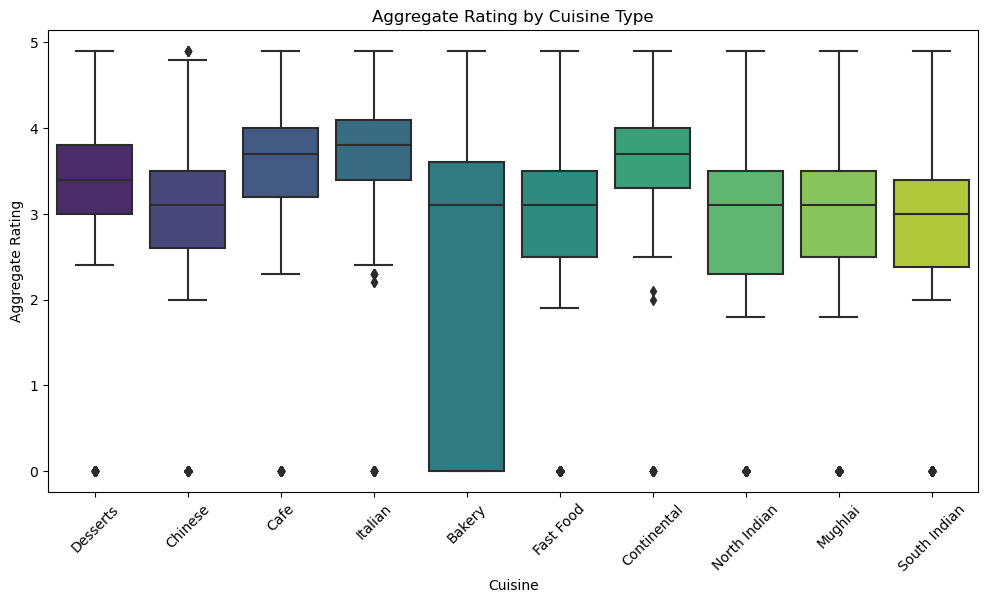

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=top_rated_cuisines, palette='viridis')
plt.title('Aggregate Rating by Cuisine Type')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

### Identify the most popular cuisines among customers based on the number of votes.

In [60]:
cuisine_votes=pd.DataFrame({"Cuisines":data["Cuisines"],"Votes":data["Votes"]})

In [61]:
cuisine_votes_sum = cuisine_votes.groupby('Cuisines')['Votes'].sum()

In [62]:
popular_cuisines=cuisine_votes_sum.sort_values(ascending=False)
popular_cuisines.head(10)

Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

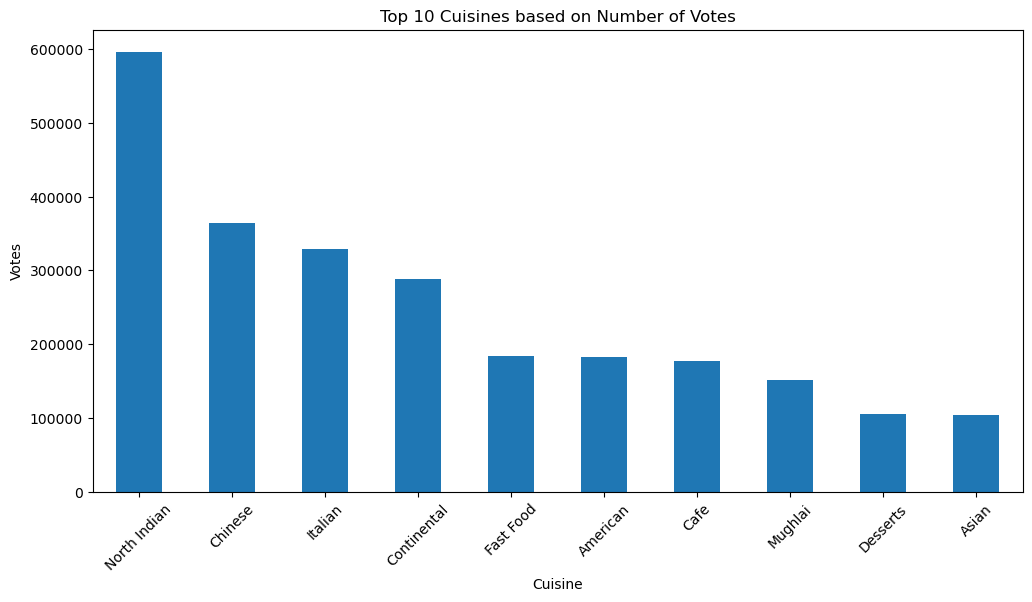

In [63]:
plt.figure(figsize=(12, 6))
popular_cuisines.head(10).plot(kind="bar") 
plt.title('Top 10 Cuisines based on Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

### Determine if there are any specific cuisines that tend to receive higher ratings.

In [64]:
avg_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

In [65]:
avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(by='Aggregate rating', ascending=False).head(10)
avg_rating_by_cuisine

,Cuisines,Aggregate rating
130,Sunda,4.900000
26,B�_rek,4.700000
132,Taiwanese,4.650000
112,Ramen,4.500000
43,Dim Sum,4.466667
61,Hawaiian,4.412500
47,D�_ner,4.400000
23,Bubble Tea,4.400000
40,Curry,4.400000
75,Kebab,4.380000


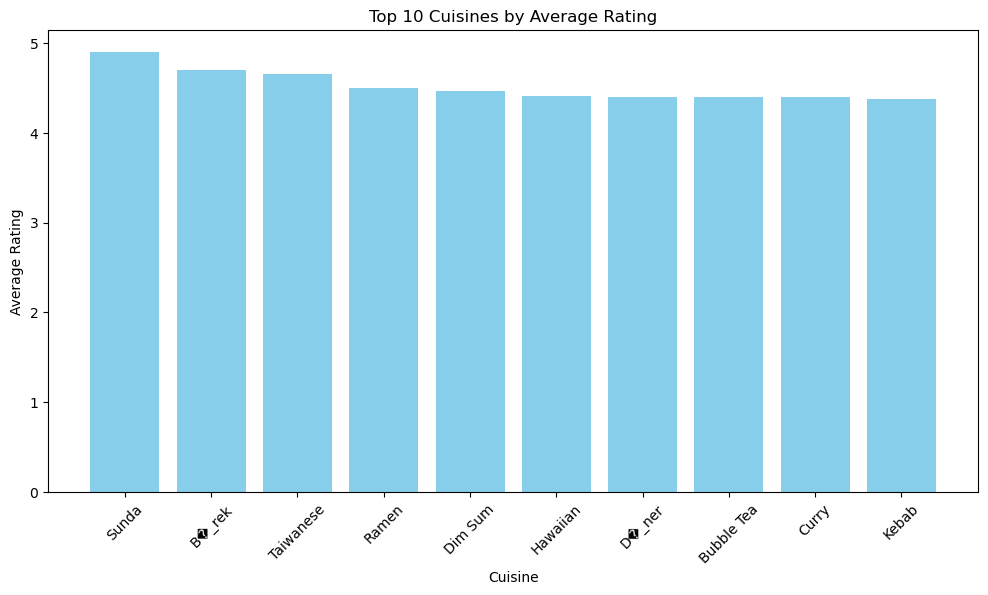

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(avg_rating_by_cuisine['Cuisines'], avg_rating_by_cuisine['Aggregate rating'], color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Level-3: Task:3 -Data Visualization

### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

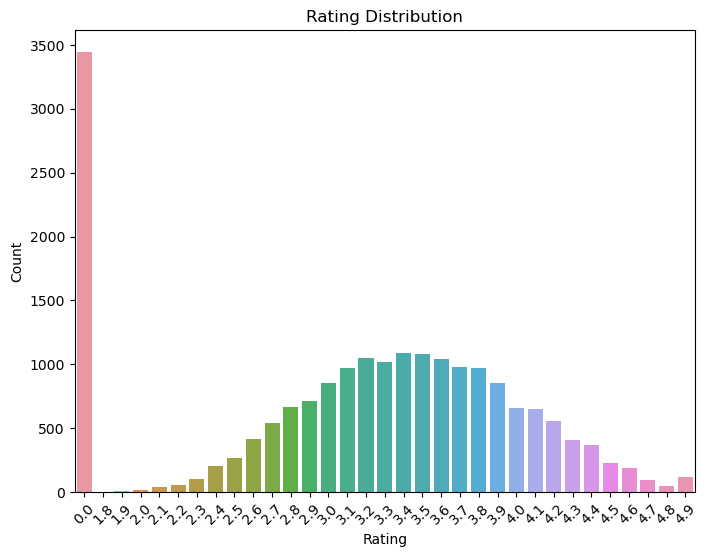

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Aggregate rating'],data=data)
plt.xlabel('Rating')
plt.ylabel("Count")
plt.title('Rating Distribution')
plt.xticks(rotation=45)
plt.show()

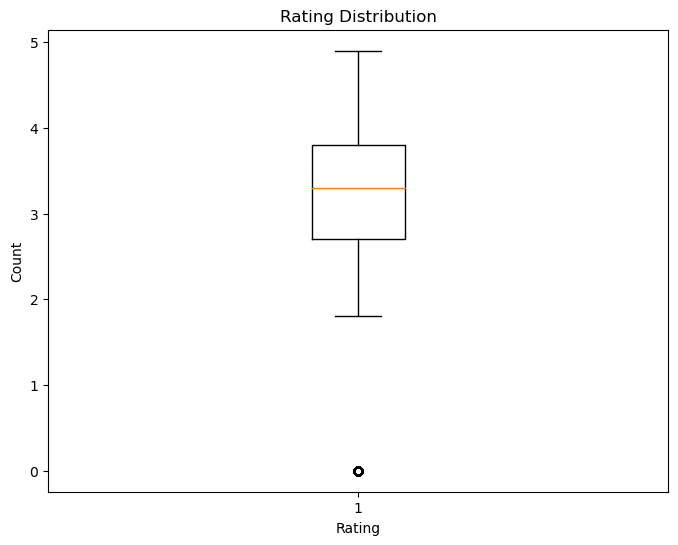

In [68]:
plt.figure(figsize=(8, 6))
plt.boxplot(x=data['Aggregate rating'],data=data)
plt.xlabel('Rating')
plt.ylabel("Count")
plt.title('Rating Distribution')
plt.show()

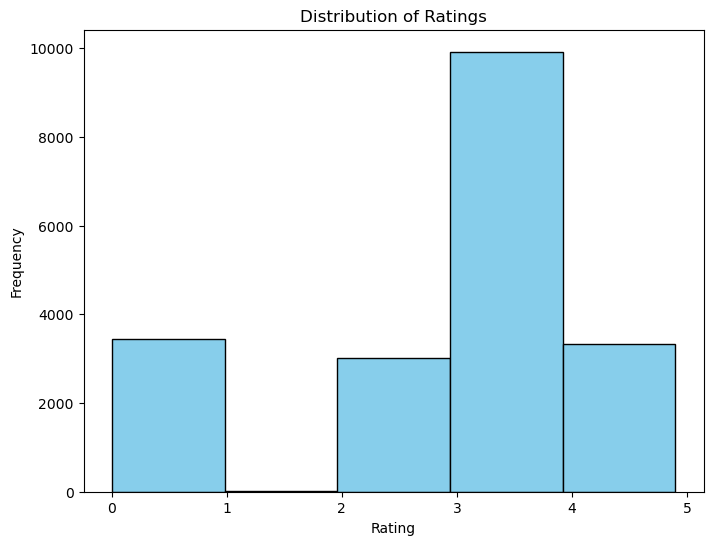

In [69]:
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [70]:
average_rating_by_city=data.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)

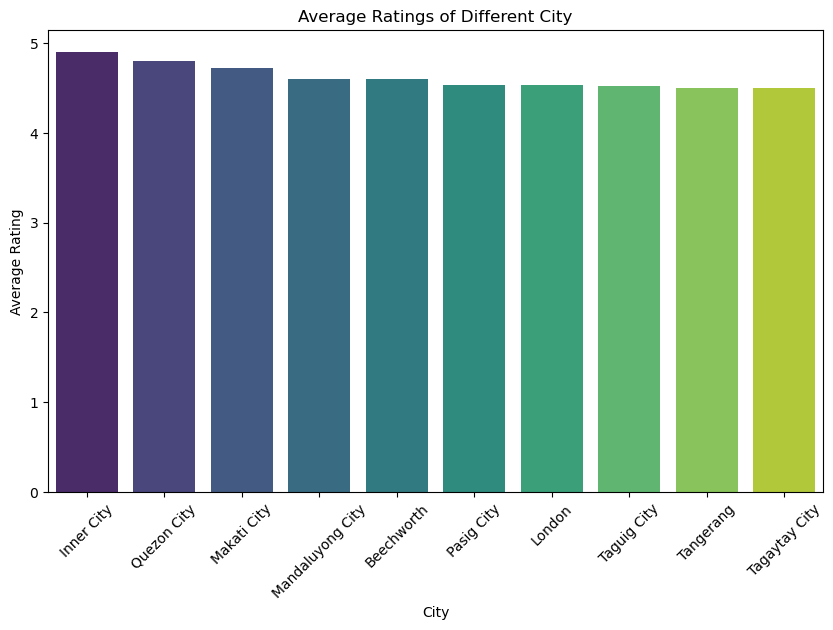

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_city.index, y=average_rating_by_city.values, palette='viridis')
plt.title('Average Ratings of Different City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### Visualize the relationship between various features and the target variable to gain insights.

In [72]:
features=["Average Cost for two","Votes","Has Table booking_1","Has Online delivery_1","Aggregate rating"]

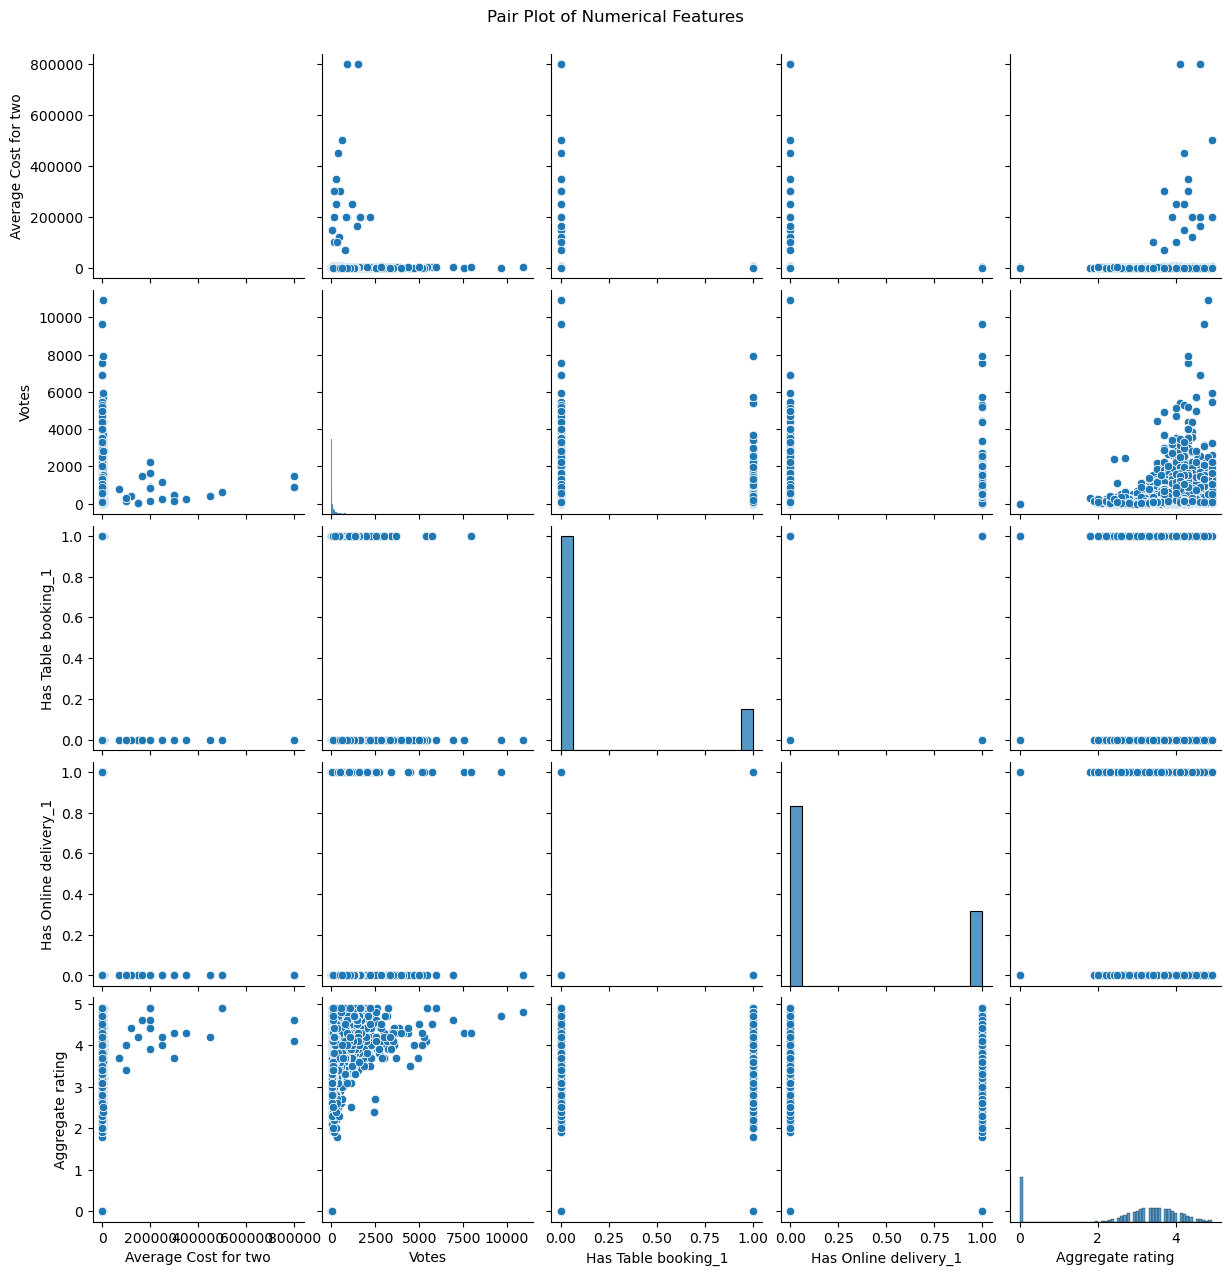

In [73]:
sns.pairplot(data[features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()